In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv('cardiotocography_v2.csv')
df.shape

(2126, 22)

In [6]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,NaN,9
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6
2,NaN,0.003,0.0,0.008,NaN,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,NaN,NaN,135.0,138.0,13.0,0.0,6
3,134.0,0.003,0.0,0.008,0.003,NaN,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,NaN,2


In [17]:
print("Dataset shape:", df.shape)

missing_values = df.isnull().sum()
print("\nMissing values per column:")
for col, missing in missing_values.items():
    if missing > 0:
        print(f"{col}: {missing} ({missing/len(df)*100:.2f}%)")

print("\nClass distribution:")
print(df['CLASS'].value_counts().sort_index())

df.describe().T

Dataset shape: (2126, 22)

Missing values per column:
LB: 103 (4.84%)
AC: 113 (5.32%)
FM: 109 (5.13%)
UC: 114 (5.36%)
DL: 85 (4.00%)
DS: 132 (6.21%)
DP: 110 (5.17%)
ASTV: 111 (5.22%)
MSTV: 102 (4.80%)
ALTV: 96 (4.52%)
MLTV: 109 (5.13%)
Width: 103 (4.84%)
Min: 126 (5.93%)
Max: 88 (4.14%)
Nmax: 105 (4.94%)
Nzeros: 124 (5.83%)
Mode: 102 (4.80%)
Mean: 107 (5.03%)
Median: 101 (4.75%)
Variance: 97 (4.56%)
Tendency: 107 (5.03%)

Class distribution:
CLASS
1     384
2     579
3      53
4      81
5      72
6     332
7     252
8     107
9      69
10    197
Name: count, dtype: int64


,count,mean,std,min,25%,50%,75%,max
LB,2023.0,133.276817,9.811552,106.0,126.000,133.000,140.000,160.000
AC,2013.0,0.003149,0.003838,0.0,0.000,0.002,0.006,0.018
FM,2017.0,0.009225,0.045050,0.0,0.000,0.000,0.003,0.481
UC,2012.0,0.004384,0.002952,0.0,0.002,0.005,0.007,0.015
DL,2041.0,0.001885,0.002955,0.0,0.000,0.000,0.003,0.015
DS,1994.0,0.000003,0.000055,0.0,0.000,0.000,0.000,0.001
DP,2016.0,0.000163,0.000601,0.0,0.000,0.000,0.000,0.005
ASTV,2015.0,47.043176,17.211507,12.0,32.000,49.000,61.000,87.000
MSTV,2024.0,1.331324,0.883493,0.2,0.700,1.200,1.700,7.000
ALTV,2030.0,9.859606,18.418215,0.0,0.000,0.000,11.000,91.000


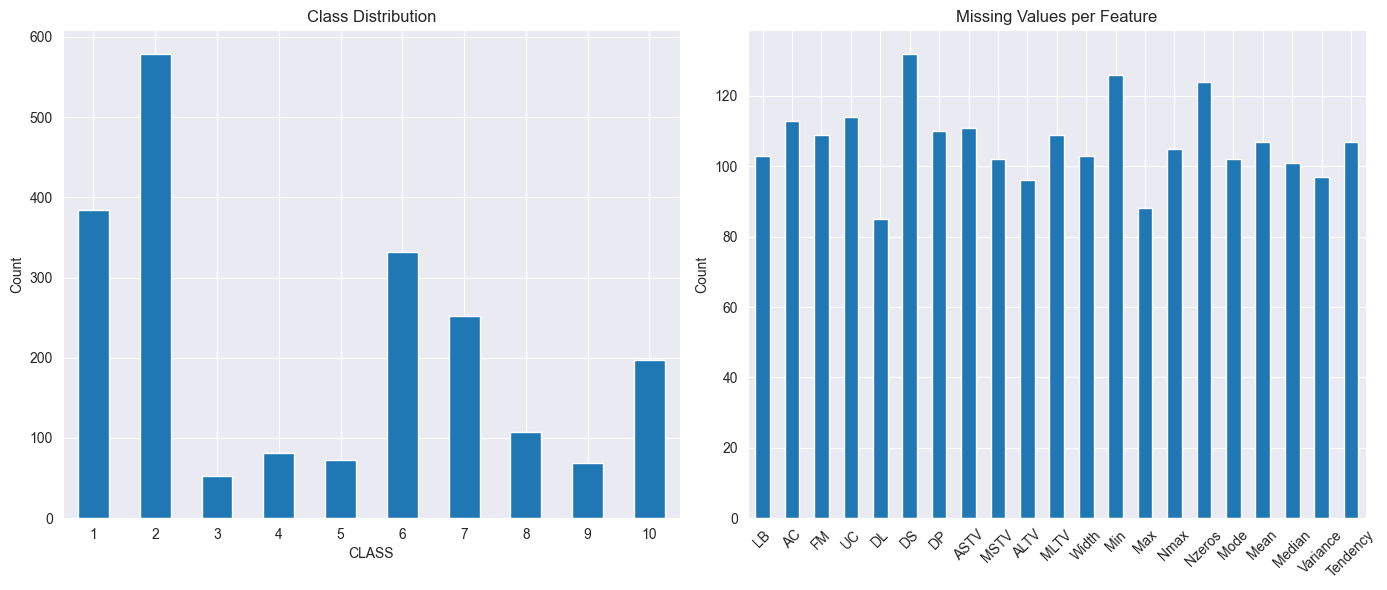

In [9]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
df['CLASS'].value_counts().sort_index().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('CLASS')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
missing = df.isnull().sum()
missing[missing > 0].plot(kind='bar')
plt.title('Missing Values per Feature')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


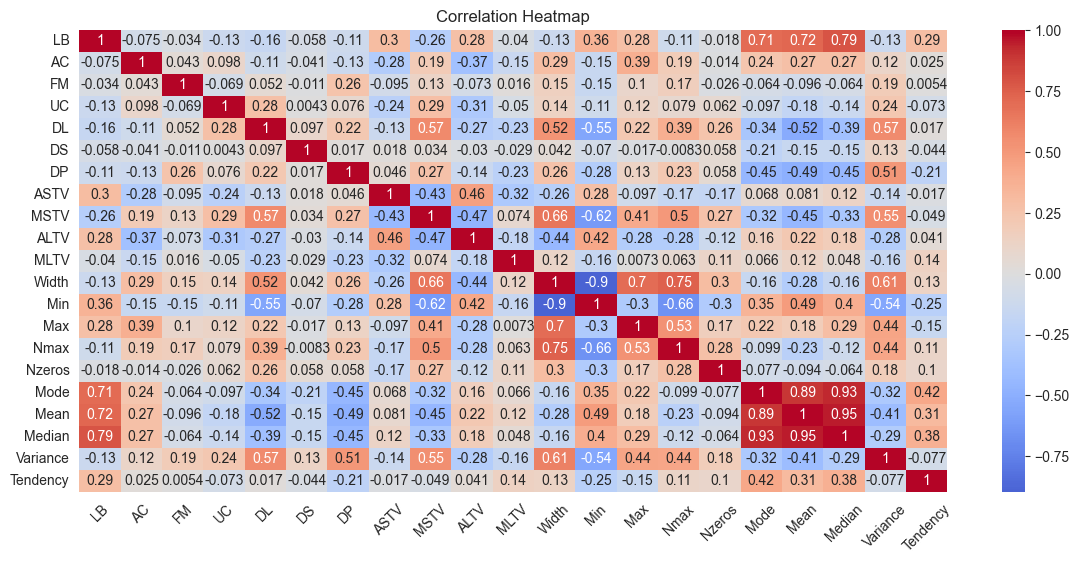

In [13]:
plt.figure(figsize=(14, 6))

# Correlation Heatmap (Top 10 features)
top_corr = df.drop('CLASS', axis=1)
sns.heatmap(top_corr.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.show()

Data preparation:

In [20]:
X = df.drop('CLASS', axis=1)
y = df['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (1700, 21)
Test set shape: (426, 21)


In [25]:
print("1. Method - removal of missing values")
data_removed = df.dropna()
X_train_removal = X_train.dropna()
X_test_removal = X_test.dropna()
print(f"Removal missing values: {data_removed.shape}")
print(f"Training set shape: {X_train_removal.shape}")
print(f"Test set shape: {X_test_removal.shape}")

print("\n2. Method - imputation with mean values")
imputer_mean = SimpleImputer(strategy='mean')
X_train_imputed_mean = pd.DataFrame(imputer_mean.fit_transform(X_train), columns=X_train.columns)
X_test_imputed_mean = pd.DataFrame(imputer_mean.transform(X_test), columns=X_test.columns)
print(f"Training set shape: {X_train_imputed_mean.shape}")
print(f"Test set shape: {X_test_imputed_mean.shape}")

print("\n3. Method - imputation with knn")
imputer_knn = KNNImputer(n_neighbors=5)
X_train_knn = pd.DataFrame(imputer_knn.fit_transform(X_train), columns=X.columns)
X_test_knn = pd.DataFrame(imputer_knn.transform(X_test), columns=X.columns)
print(f"Training set shape: {X_train_knn.shape}")
print(f"Test set shape: {X_test_knn.shape}")

print("\n4. Method - interpolation")
X_train_interpolation = X_train.interpolate()
X_test_interpolation = X_test.interpolate()
print(f"Training set shape: {X_train_interpolation.shape}")
print(f"Test set shape: {X_test_interpolation.shape}")

1. Method - removal of missing values
Removal missing values: (743, 22)
Training set shape: (601, 21)
Test set shape: (142, 21)

2. Method - imputation with mean values
Training set shape: (1700, 21)
Test set shape: (426, 21)

3. Method - imputation with knn
Training set shape: (1700, 21)
Test set shape: (426, 21)

4. Method - interpolation
Training set shape: (1700, 21)
Test set shape: (426, 21)
